In [4]:
import os
os.getcwdb()

b'C:\\Users\\Naheed\\Documents'

In [5]:
# Import the files and Name them (rewrite directory path)

import pandas as pd
Census_Data = pd.read_csv("C:/Users/Naheed/Documents/DAE/Data/Censes_group_data_sources.csv")
FAA_Est_Data = pd.read_csv("C:/Users/Naheed/Documents/DAE/Data/FAA_estimated_state_level_hour.csv")
GA_Data = pd.read_csv("C:/Users/Naheed/Documents/DAE/Data/GA_survey.csv")
Region_Data = pd.read_csv("C:/Users/Naheed/Documents/DAE/Data/Region_state_Lookup.csv")
StateArea_Data = pd.read_csv("C:/Users/Naheed/Documents/DAE/Data/state_area.csv")
StateCode_Data = pd.read_csv("C:/Users/Naheed/Documents/DAE/Data/State_code.csv")
Zipcode_Data = pd.read_csv("C:/Users/Naheed/Documents/DAE/Data/ZIPCode_State_Lookup.csv")

print(Census_Data.head(5))
print(FAA_Est_Data.head(5))
print(GA_Data.head(5))
print(Region_Data.head(5))
print(StateArea_Data.head(5))
print(StateCode_Data.head(5))
print(Zipcode_Data.head(5))

          GEOID   AWATER  PILOT  Aircraft  Forest  Agri  School  Airport  \
0  3.602900e+11        0      1         0       1     2       0        0   
1  2.500390e+11   241166      2         0   34980   635       0        0   
2  2.500100e+11   636180      0         0     693     8       0        0   
3  2.603200e+11  3435785      0         0    1811   771       0        1   
4  2.601000e+11  9850431      0         0    1738  4251       0        0   

         Area ZipCode  
0    731589.0   14043  
1  40039490.0    1266  
2   3515559.0    2655  
3  17415863.0   49721  
4  19464756.0   49690  
        State        Hours
0     Alabama     520,417 
1      Alaska     865,282 
2     Arizona     578,428 
3    Arkansas     308,773 
4  California   2,230,278 
        REGION  Unnamed: 1  All_hours  Std  Class_G_Hours  Unnamed: 5  School  \
0      Alaskan         NaN    865,282  3.7          37338         NaN       6   
1      Central         NaN  1,174,950  3.2          50700         NaN      

In [6]:
# Merge Tables

Census_Data.dtypes
df1 = pd.merge(StateArea_Data, StateCode_Data, on="STATE_1")


In [7]:
df2 = pd.merge(df1, Region_Data, on="STATE")
df2 = df2.drop(columns=['STATE_1_y', 'State_code_y'])
df2 = df2.rename(columns={"STATE_1_x": "State", "STATE": "STATE_Abbr", "State_code_x": "State_code"})
df2.head(5)

,State,Area,STATE_Abbr,State_code,Region
0,Alaska,665384.04,AK,2,1
1,Texas,268596.46,TX,48,8
2,California,163694.74,CA,6,9
3,Montana,147039.71,MT,30,6
4,New Mexico,121590.30,NM,35,8


In [8]:
Zipcode_Data.dtypes
df3 = pd.merge(Zipcode_Data, df2, on="State")
df3.head(5)

,ZipCode,State_code_x,State,Area,STATE_Abbr,State_code_y,Region
0,35586,1,Alabama,52420.07,AL,1,7
1,36350,1,Alabama,52420.07,AL,1,7
2,35179,1,Alabama,52420.07,AL,1,7
3,35046,1,Alabama,52420.07,AL,1,7
4,35151,1,Alabama,52420.07,AL,1,7


In [9]:
df3 = df3.drop(columns=['State_code_x'])
df3 = df3.rename(columns={"State_code_y": "State_code"})
df3 = df3.rename(columns={"Area": "State_Area"})
df3.head(5)

,ZipCode,State,State_Area,STATE_Abbr,State_code,Region
0,35586,Alabama,52420.07,AL,1,7
1,36350,Alabama,52420.07,AL,1,7
2,35179,Alabama,52420.07,AL,1,7
3,35046,Alabama,52420.07,AL,1,7
4,35151,Alabama,52420.07,AL,1,7


In [10]:
df4 = pd.merge(df3, FAA_Est_Data, on="State")
df4 = df4.rename(columns={"Hours": "FAA_Est_Hours"})
df4.head(5)



,ZipCode,State,State_Area,STATE_Abbr,State_code,Region,FAA_Est_Hours
0,35586,Alabama,52420.07,AL,1,7,"520,417"
1,36350,Alabama,52420.07,AL,1,7,"520,417"
2,35179,Alabama,52420.07,AL,1,7,"520,417"
3,35046,Alabama,52420.07,AL,1,7,"520,417"
4,35151,Alabama,52420.07,AL,1,7,"520,417"


In [11]:
df4.head(5)

,ZipCode,State,State_Area,STATE_Abbr,State_code,Region,FAA_Est_Hours
0,35586,Alabama,52420.07,AL,1,7,"520,417"
1,36350,Alabama,52420.07,AL,1,7,"520,417"
2,35179,Alabama,52420.07,AL,1,7,"520,417"
3,35046,Alabama,52420.07,AL,1,7,"520,417"
4,35151,Alabama,52420.07,AL,1,7,"520,417"


In [12]:
Census_Data.head(5)

,GEOID,AWATER,PILOT,Aircraft,Forest,Agri,School,Airport,Area,ZipCode
0,3.602900e+11,0,1,0,1,2,0,0,731589.0,14043
1,2.500390e+11,241166,2,0,34980,635,0,0,40039490.0,1266
2,2.500100e+11,636180,0,0,693,8,0,0,3515559.0,2655
3,2.603200e+11,3435785,0,0,1811,771,0,1,17415863.0,49721
4,2.601000e+11,9850431,0,0,1738,4251,0,0,19464756.0,49690


In [13]:
Census_Data['ZipCode'] = pd.to_numeric(Census_Data['ZipCode'], errors='coerce')
Census_Data.dtypes

GEOID       float64
AWATER        int64
PILOT         int64
Aircraft      int64
Forest        int64
Agri          int64
School        int64
Airport       int64
Area        float64
ZipCode     float64
dtype: object

In [14]:
Census_CData = pd.merge(Census_Data, df4, on="ZipCode")
Census_CData.head(5)

,GEOID,AWATER,PILOT,Aircraft,Forest,Agri,School,Airport,Area,ZipCode,State,State_Area,STATE_Abbr,State_code,Region,FAA_Est_Hours
0,3.602900e+11,0,1,0,1,2,0,0,731589.0,14043.0,New York,54554.98,NY,36,3,"575,990"
1,3.602900e+11,0,0,0,0,0,0,0,686304.0,14043.0,New York,54554.98,NY,36,3,"575,990"
2,3.602900e+11,0,1,1,318,54,0,0,1887973.0,14043.0,New York,54554.98,NY,36,3,"575,990"
3,3.602900e+11,0,0,0,89,47,0,0,661000.0,14043.0,New York,54554.98,NY,36,3,"575,990"
4,3.602900e+11,0,3,0,193,6,0,0,1342631.0,14043.0,New York,54554.98,NY,36,3,"575,990"


In [15]:
print(GA_Data.head(5))
GA_Data = GA_Data.rename(columns={"REGION": "REGION_NAME", "Aircraft": "GA_Aircraft",
                                  "Forest": "GA_Forest","School": "GA_School","Airport": "GA_Airport",
                                  "Area": "GA_Area", " General Aviation Use Sight See": "General Aviation Use Sight See"})
GA_Data.dtypes
Region = [1,2,3,4,5,6,7,8,9]
GA_Data['Region']=Region
GA_Data = GA_Data.drop(columns=['Unnamed: 1', 'Unnamed: 5','Unnamed: 13','Unnamed: 19'])

GA_Data.head(10)

        REGION  Unnamed: 1  All_hours  Std  Class_G_Hours  Unnamed: 5  School  \
0      Alaskan         NaN    865,282  3.7          37338         NaN       6   
1      Central         NaN  1,174,950  3.2          50700         NaN      23   
2      Eastern         NaN  3,042,508  3.3         131287         NaN      85   
3  Great Lakes         NaN  3,252,050  2.9         140329         NaN      71   
4  New England         NaN    792,266  4.2          34187         NaN      24   

   Aircraft  Airport  Pilot  ...  Rotocraft_Turbine  Unnamed: 19  \
0      8740      759   6937  ...        12288.85101                
1     16041     1428  23267  ...        16686.79747          NaN   
2     34930     2468  59474  ...        43210.10665          NaN   
3     43366     3845  75738  ...        46186.05024          NaN   
4      8597      866  18482  ...        11251.86798          NaN   

   Aerial App Ag    Aerial Obs  Aerial App Other  External Load  \
0    21752.59658   8406.898522       

,REGION_NAME,All_hours,Std,Class_G_Hours,GA_School,GA_Aircraft,GA_Airport,Pilot,Arg,GA_Forest,...,Rotocraft_Turbine,Aerial App Ag,Aerial Obs,Aerial App Other,External Load,General Aviation Use Sight See,General Aviation Use Air Med,On-Demand FAR Part 135 Use Air Tours,On-Demand FAR Part 135 Use Air Med,Region
0,Alaskan,"865,282",3.7,37338,6,8740,759,6937,291215,369711141,...,12288.85101,21752.59658,8406.898522,2081.616454,2168.388054,109.294215,136.120647,159.586503,2523.262330,1
1,Central,"1,174,950",3.2,50700,23,16041,1428,23267,369383613,116122983,...,16686.79747,29537.43791,11415.567890,2826.587462,2944.412970,148.408539,184.835642,216.699483,3426.290013,2
2,Eastern,"3,042,508",3.3,131287,85,34930,2468,59474,49015046,313520383,...,43210.10665,76486.56636,29560.369930,7319.388030,7624.494674,384.300751,478.627958,561.138696,8872.305012,3
3,Great Lakes,"3,252,050",2.9,140329,71,43366,3845,75738,571488676,272869735,...,46186.05024,81754.30866,31596.236070,7823.485047,8149.604834,410.768108,511.591769,599.785143,9483.353705,4
4,New England,"792,266",4.2,34187,24,8597,866,18482,3450856,131577126,...,11251.86798,19917.02437,7697.490373,1905.961226,1985.410687,100.071526,124.634235,146.119948,2310.339234,5
5,Northwest Mountain,"3,672,793",3.0,158485,80,41072,2332,61672,202273326,520029325,...,52161.49875,92331.49938,35684.086860,8835.670151,9203.982592,463.912373,577.780375,677.384012,10710.288930,6
6,Southern,"5,413,243",2.3,233587,161,52621,3283,119774,123960837,498215662,...,76879.60306,136085.21980,52593.934210,13022.685890,13565.532920,683.749508,851.576871,998.380322,15785.642310,7
7,Southwestern,"4,013,259",2.7,173176,77,43094,3512,85610,212253524,292585739,...,56996.84254,100890.58130,38991.983140,9654.732177,10057.186990,506.916809,631.340315,740.177157,11703.127140,8
8,Western-Pacific,"3,339,578",2.8,144106,98,37881,1397,77907,58277130,177498376,...,47429.13463,83954.70260,32446.639770,8034.051920,8368.949128,421.823815,525.361116,615.928189,9738.595471,9


In [16]:
Census_CData.dtypes

GEOID            float64
AWATER             int64
PILOT              int64
Aircraft           int64
Forest             int64
Agri               int64
School             int64
Airport            int64
Area             float64
ZipCode          float64
State             object
State_Area       float64
STATE_Abbr        object
State_code         int64
Region             int64
FAA_Est_Hours     object
dtype: object

In [17]:
GA_Data.dtypes

REGION_NAME                              object
All_hours                                object
Std                                     float64
Class_G_Hours                             int64
GA_School                                 int64
GA_Aircraft                               int64
GA_Airport                                int64
Pilot                                     int64
Arg                                       int64
GA_Forest                                 int64
GA_Area                                 float64
Fixed_wings_Piston_1_Engine             float64
Fixed_wings_Piston_2_Engine             float64
Fixed_wings_Turboprop                   float64
Rotocraft_piston                        float64
Rotocraft_Turbine                       float64
Aerial App Ag                           float64
Aerial Obs                              float64
Aerial App Other                        float64
External Load                           float64
General Aviation Use Sight See          

In [18]:
GA_Census_Data = pd.merge(Census_CData, GA_Data, on='Region')
GA_Census_Data.head(5)

,GEOID,AWATER,PILOT,Aircraft,Forest,Agri,School,Airport,Area,ZipCode,...,Rotocraft_piston,Rotocraft_Turbine,Aerial App Ag,Aerial Obs,Aerial App Other,External Load,General Aviation Use Sight See,General Aviation Use Air Med,On-Demand FAR Part 135 Use Air Tours,On-Demand FAR Part 135 Use Air Med
0,3.602900e+11,0,1,0,1,2,0,0,731589.0,14043.0,...,4641.96536,43210.10665,76486.56636,29560.36993,7319.38803,7624.494674,384.300751,478.627958,561.138696,8872.305012
1,3.602900e+11,0,0,0,0,0,0,0,686304.0,14043.0,...,4641.96536,43210.10665,76486.56636,29560.36993,7319.38803,7624.494674,384.300751,478.627958,561.138696,8872.305012
2,3.602900e+11,0,1,1,318,54,0,0,1887973.0,14043.0,...,4641.96536,43210.10665,76486.56636,29560.36993,7319.38803,7624.494674,384.300751,478.627958,561.138696,8872.305012
3,3.602900e+11,0,0,0,89,47,0,0,661000.0,14043.0,...,4641.96536,43210.10665,76486.56636,29560.36993,7319.38803,7624.494674,384.300751,478.627958,561.138696,8872.305012
4,3.602900e+11,0,3,0,193,6,0,0,1342631.0,14043.0,...,4641.96536,43210.10665,76486.56636,29560.36993,7319.38803,7624.494674,384.300751,478.627958,561.138696,8872.305012


In [19]:
GA_Census_Data.dtypes

GEOID                                   float64
AWATER                                    int64
PILOT                                     int64
Aircraft                                  int64
Forest                                    int64
Agri                                      int64
School                                    int64
Airport                                   int64
Area                                    float64
ZipCode                                 float64
State                                    object
State_Area                              float64
STATE_Abbr                               object
State_code                                int64
Region                                    int64
FAA_Est_Hours                            object
REGION_NAME                              object
All_hours                                object
Std                                     float64
Class_G_Hours                             int64
GA_School                               

In [20]:
GA_Data.dtypes

REGION_NAME                              object
All_hours                                object
Std                                     float64
Class_G_Hours                             int64
GA_School                                 int64
GA_Aircraft                               int64
GA_Airport                                int64
Pilot                                     int64
Arg                                       int64
GA_Forest                                 int64
GA_Area                                 float64
Fixed_wings_Piston_1_Engine             float64
Fixed_wings_Piston_2_Engine             float64
Fixed_wings_Turboprop                   float64
Rotocraft_piston                        float64
Rotocraft_Turbine                       float64
Aerial App Ag                           float64
Aerial Obs                              float64
Aerial App Other                        float64
External Load                           float64
General Aviation Use Sight See          

In [21]:
# Missing Data
GA_Census_Data.isna().sum()

GEOID                                   0
AWATER                                  0
PILOT                                   0
Aircraft                                0
Forest                                  0
Agri                                    0
School                                  0
Airport                                 0
Area                                    0
ZipCode                                 0
State                                   0
State_Area                              0
STATE_Abbr                              0
State_code                              0
Region                                  0
FAA_Est_Hours                           0
REGION_NAME                             0
All_hours                               0
Std                                     0
Class_G_Hours                           0
GA_School                               0
GA_Aircraft                             0
GA_Airport                              0
Pilot                             

In [22]:
GA_Census_Data.dtypes

GEOID                                   float64
AWATER                                    int64
PILOT                                     int64
Aircraft                                  int64
Forest                                    int64
Agri                                      int64
School                                    int64
Airport                                   int64
Area                                    float64
ZipCode                                 float64
State                                    object
State_Area                              float64
STATE_Abbr                               object
State_code                                int64
Region                                    int64
FAA_Est_Hours                            object
REGION_NAME                              object
All_hours                                object
Std                                     float64
Class_G_Hours                             int64
GA_School                               

In [23]:
# Convert for encoding
GA_Census_Data['All_hours'] = GA_Census_Data['All_hours'].replace(',','', regex=True)
GA_Census_Data.dtypes
GA_Census_Data['All_hours'] = GA_Census_Data['All_hours'].astype(int)
GA_Census_Data['All_hours'].head(5)
GA_Census_Data['FAA_Est_Hours'] = GA_Census_Data['FAA_Est_Hours'].replace(',','', regex=True)
GA_Census_Data['FAA_Est_Hours'] = GA_Census_Data['FAA_Est_Hours'].astype(int)
GA_Census_Data['FAA_Est_Hours'].head(5)



0    575990
1    575990
2    575990
3    575990
4    575990
Name: FAA_Est_Hours, dtype: int32

C:\Users\Naheed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'FAA Estimated Hours')]

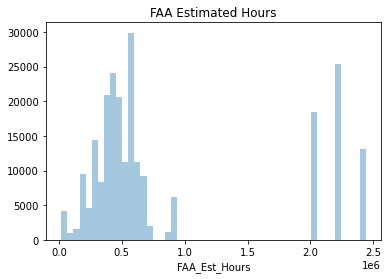

In [24]:
# Visualization 

import seaborn as sns

# Plot the histogram thanks to the distplot function
sns.distplot( a=GA_Census_Data["FAA_Est_Hours"],
             hist=True, kde=False, rug=False).set(title='FAA Estimated Hours')


[Text(0.5, 1.0, 'GA_Area')]

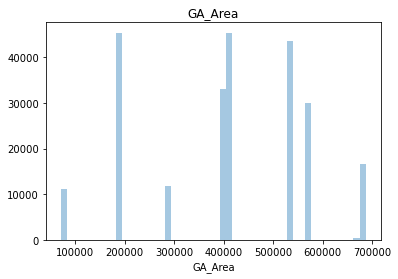

In [25]:
# Plot the histogram thanks to the distplot function
sns.distplot( a=GA_Census_Data["GA_Area"],
             hist=True, kde=False, rug=False).set(title='GA_Area')

[Text(0.5, 1.0, 'Estimated Flight Hours by Region')]

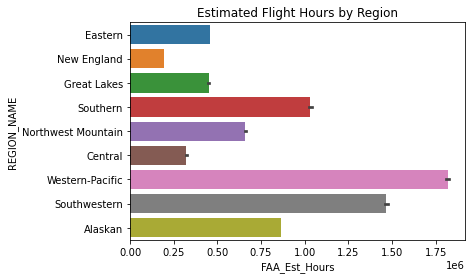

In [91]:
# Plot the histogram thanks to the distplot function
sns.barplot(x="FAA_Est_Hours", y="REGION_NAME", data=GA_Census_Data).set(title='Estimated Flight Hours by Region')

In [99]:
# Plot the histogram thanks to the distplot function
top_10 = (GA_Census_Data.groupby('State')['FAA_Est_Hours', 'PILOT',
                                          'Aircraft',
                                          'Airport'].agg({'FAA_Est_Hours': 'sum',
                                                                      'PILOT': 'count',
                                                          'Aircraft': 'count', 'Airport':'count'}).sort_values(by='FAA_Est_Hours', ascending=False))[:10].reset_index()
top_10


C:\Users\Naheed\AppData\Local\Temp/ipykernel_4828/848770265.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10 = (GA_Census_Data.groupby('State')['FAA_Est_Hours', 'PILOT',


,State,FAA_Est_Hours,PILOT,Aircraft,Airport
0,California,5.653086e+10,25347,25347,25347
1,Texas,3.728239e+10,18490,18490,18490
2,Florida,3.202543e+10,13124,13124,13124
3,New York,9.045923e+09,15705,15705,15705
4,Ohio,5.292339e+09,9459,9459,9459
5,Illinois,4.661946e+09,9876,9876,9876
6,Pennsylvania,4.628844e+09,10166,10166,10166
7,North Carolina,4.554273e+09,7042,7042,7042
8,Georgia,3.874271e+09,7403,7403,7403
9,Michigan,3.608059e+09,8309,8309,8309


[Text(0.5, 1.0, 'Number of Pilots by State')]

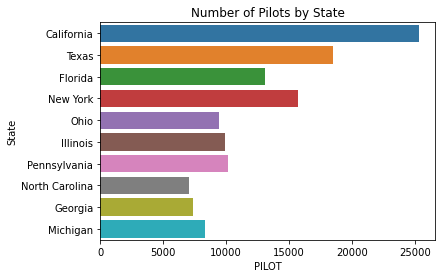

In [102]:
sns.barplot(x="PILOT", y="State", data=top_10).set(title='Number of Pilots by State')

[Text(0.5, 1.0, 'Number of Aircraft by State')]

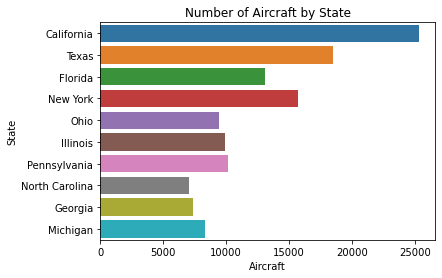

In [104]:
sns.barplot(x="Aircraft", y="State", data=top_10).set(title='Number of Aircraft by State')

[Text(0.5, 1.0, 'Number of Airport by State')]

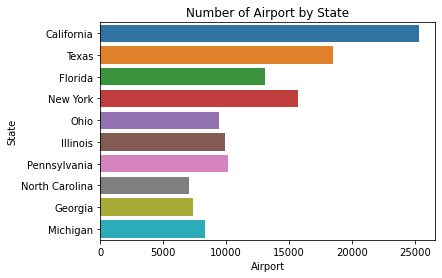

In [106]:
sns.barplot(x="Airport", y="State", data=top_10).set(title='Number of Airport by State')

<AxesSubplot:title={'center':'Estimated Flight Hours by State'}, xlabel='Estimated Flight Hours', ylabel='State'>

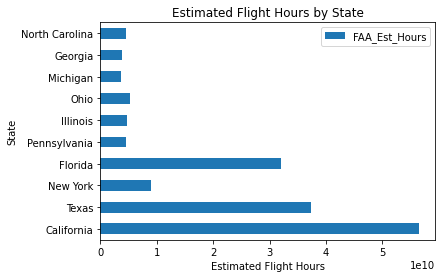

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set(title='Estimated Flight Hours by State', xlabel='Estimated Flight Hours', ylabel='State')
top_10.plot(kind='barh', y="FAA_Est_Hours", x="State", ax=ax)


C:\Users\Naheed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'All hours')]

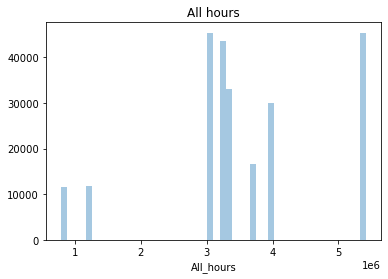

In [24]:
# Plot the histogram thanks to the distplot function
sns.distplot( a=GA_Census_Data["All_hours"],
             hist=True, kde=False, rug=False).set(title='All hours')

In [25]:
# Convert Categorical data
GAC_Data = pd.get_dummies(data=GA_Census_Data)
GAC_Data.dtypes

GEOID                             float64
AWATER                              int64
PILOT                               int64
Aircraft                            int64
Forest                              int64
                                   ...   
REGION_NAME_New England             uint8
REGION_NAME_Northwest Mountain      uint8
REGION_NAME_Southern                uint8
REGION_NAME_Southwestern            uint8
REGION_NAME_Western-Pacific         uint8
Length: 148, dtype: object

In [26]:
# Array Manipulation

import numpy as np
Pred_FH = np.array(GAC_Data['FAA_Est_Hours'])
GACF_Data= GAC_Data.drop('FAA_Est_Hours', axis = 1)
feature_list = list(GACF_Data.columns)
features = np.array(GACF_Data)


In [27]:
# Trainning and Test data

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_FH, test_FH = train_test_split(features, Pred_FH, 
test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Flight Hours Shape:', train_FH.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Flight Hours Shape:', test_FH.shape)


Training Features Shape: (178092, 147)
Training Flight Hours Shape: (178092,)
Testing Features Shape: (59364, 147)
Testing Flight Hours Shape: (59364,)


In [28]:
# Train Model

from sklearn.ensemble import RandomForestRegressor
random_f = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_f.fit(train_features, train_FH)

RandomForestRegressor(random_state=42)

In [29]:
# Make Predictions

# Use the forest's predict method on the test data
predictions = random_f.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_FH)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 0.05


In [30]:
# Calculate mean absolute percentage error

mape = 100 * (errors / test_FH)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 100.0 %.


In [31]:
# Get numerical feature importances
importances = list(random_f.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:148} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: State_Area                                                                                                                                           Importance: 0.62
Variable: State_Florida                                                                                                                                        Importance: 0.22
Variable: STATE_Abbr_FL                                                                                                                                        Importance: 0.12
Variable: ZipCode                                                                                                                                              Importance: 0.01
Variable: State_code                                                                                                                                           Importance: 0.01
Variable: GEOID                                                                                                         

In [32]:
# New random forest with only the 5 most important variables
randf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('State_Area'), feature_list.index('State_Florida'),
                     feature_list.index('STATE_Abbr_FL'),feature_list.index('ZipCode'),
                     feature_list.index('State_code')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
randf_most_important.fit(train_important, train_FH)

# Make predictions and determine the error
predictions = randf_most_important.predict(test_important)
errors = abs(predictions - test_FH)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_FH))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.0
Accuracy: 100.0 %.


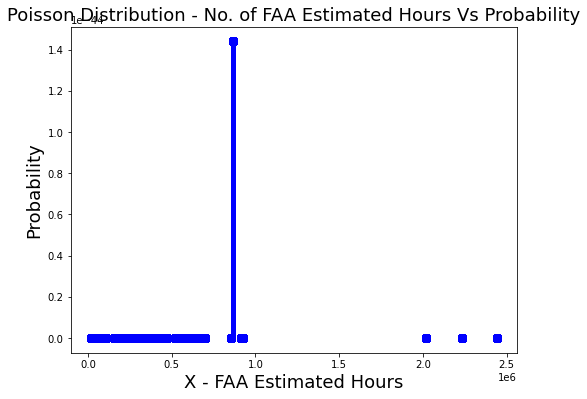

In [34]:
# Poisson Distribution - Probability mass function

from scipy.stats import poisson
import matplotlib.pyplot as plt
#
lmbda = GAC_Data['FAA_Est_Hours'].mean()
X = GAC_Data['FAA_Est_Hours']

poisson_pd = poisson.pmf(X, lmbda)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - FAA Estimated Hours", fontsize="18")
plt.title("Poisson Distribution - No. of FAA Estimated Hours Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

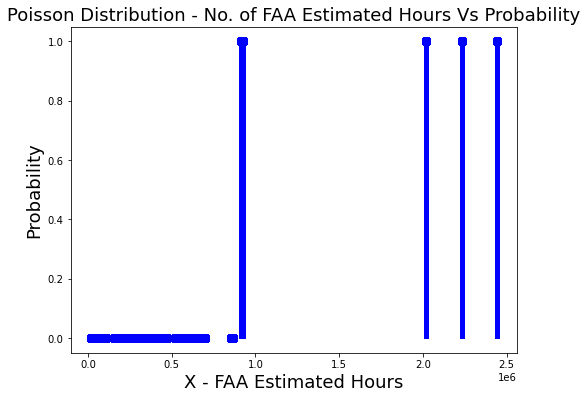

In [45]:
# Poisson Distribution - Cumulative density function

poisson_cdf = poisson.cdf(X, lmbda)

# Plot the probability distribution

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_cdf, 'bo', ms=8, label='poisson cdf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - FAA Estimated Hours", fontsize="18")
plt.title("Poisson Distribution - No. of FAA Estimated Hours Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_cdf, colors='b', lw=5, alpha=0.5)